[Open to Colab](https://colab.research.google.com/drive/1YEpj3iXrOXkjWOrCgpvfDcV119cPQPW-?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
!unzip -qq "/content/gdrive/MyDrive/happy_images.zip"

In [ ]:
# Creating training dataframe
df_train=pd.read_csv('/content/gdrive/MyDrive/train.csv',names=['image_name','smile_type'])
df_train.head()

,image_name,smile_type
0,05684c70-113d-4894-920e-140edf323528,negative smile
1,0403faa2-2d45-4779-b40a-794c220d3855,positive smile
2,1ba6784e-3684-4f76-81b7-504610a497e1,positive smile
3,675c87fb-bf50-481e-949d-07b5dc14b589,positive smile
4,02567fbb-1147-4186-8d7d-38611569fc06,NOT smile


In [ ]:
# Exploring training dataframe
print('Shape of training dataframe :',df_train.shape)

Shape of training dataframe : (4831, 2)


In [ ]:
# Checking info of training dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  4831 non-null   object
 1   smile_type  4831 non-null   object
dtypes: object(2)
memory usage: 75.6+ KB


In [ ]:
# Checking for null values
df_train.isnull().sum()

image_name    0
smile_type    0
dtype: int64

In [ ]:
# Checking unique classes in target variable 
df_train.smile_type.unique()

array(['negative smile', 'positive smile', 'NOT smile'], dtype=object)

In [ ]:
# values count in target variable 
df_train['smile_type'].value_counts()

NOT smile         3356
positive smile     988
negative smile     487
Name: smile_type, dtype: int64

Text(0.5, 1.0, 'Barplot for training data')

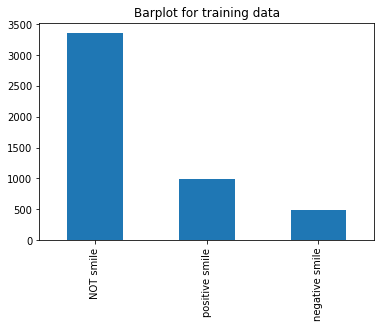

In [ ]:
# Visualizing above values using bar plot
df_train['smile_type'].value_counts().plot(kind='bar')
plt.title('Barplot for training data')

In [ ]:
# Creating testing dataframe
df_test=pd.read_csv('/content/gdrive/MyDrive/test.csv',names=['image_name','smile_type'])
df_test.head()

,image_name,smile_type
0,7a0e7396-47ca-421c-84bc-de7c946fc163,NOT smile
1,1e53ec28-b4c0-4eef-ad91-4940f535d354,NOT smile
2,05f0d520-8e85-4490-a160-5a346fc21fd3,positive smile
3,0adf2567-b325-47a8-a2c9-83b34c021163,NOT smile
4,0df7e500-a1d0-44dd-923d-25809fa38611,NOT smile


In [ ]:
# Exploring testing dataframe
print('Shape of training dataframe :',df_test.shape)

Shape of training dataframe : (1611, 2)


In [ ]:
# Checking info of testing dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  1611 non-null   object
 1   smile_type  1611 non-null   object
dtypes: object(2)
memory usage: 25.3+ KB


In [ ]:
# Checking for null values
df_test.isnull().sum()

image_name    0
smile_type    0
dtype: int64

In [ ]:
# Checking unique classes in target variable 
df_test.smile_type.unique()

array(['NOT smile', 'positive smile', 'negative smile'], dtype=object)

In [ ]:
# By seeing the path of an image file we can say that the formate of file is of '.jpg' type
# adding '.jpg' at the end of every image_name in dataframe
# making a copy of dataframe so that original data will not change
train_df=df_train.copy()
def add_jpg(row):
  row=row+'.jpg'
 
  return row

train_df['image_name']=train_df['image_name'].apply(add_jpg)
#train_df['smile_type']=train_df['smile_type'].replace(
#    ['NOT smile', 'positive smile', 'negative smile'],[0,1,2])
train_df.head()

,image_name,smile_type
0,05684c70-113d-4894-920e-140edf323528.jpg,negative smile
1,0403faa2-2d45-4779-b40a-794c220d3855.jpg,positive smile
2,1ba6784e-3684-4f76-81b7-504610a497e1.jpg,positive smile
3,675c87fb-bf50-481e-949d-07b5dc14b589.jpg,positive smile
4,02567fbb-1147-4186-8d7d-38611569fc06.jpg,NOT smile


In [ ]:
# doing same for test data
test_df=df_test.copy()
test_df['image_name']=test_df['image_name'].apply(add_jpg)

#test_df['smile_type']=test_df['smile_type'].replace(
 #   ['NOT smile', 'positive smile', 'negative smile'],['0','1','2'])
test_df.head()

,image_name,smile_type
0,7a0e7396-47ca-421c-84bc-de7c946fc163.jpg,NOT smile
1,1e53ec28-b4c0-4eef-ad91-4940f535d354.jpg,NOT smile
2,05f0d520-8e85-4490-a160-5a346fc21fd3.jpg,positive smile
3,0adf2567-b325-47a8-a2c9-83b34c021163.jpg,NOT smile
4,0df7e500-a1d0-44dd-923d-25809fa38611.jpg,NOT smile


In [ ]:
# Unzipping data
import zipfile
with zipfile.ZipFile("/content/gdrive/MyDrive/happy_images.zip","r") as zip_ref:
    zip_ref.extractall("happy_images_dir")

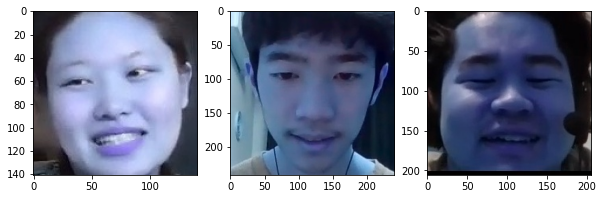

In [ ]:
# Checking on size of images
import cv2
plt.figure(figsize=(10,10))
plt.subplot(131)
img=cv2.imread('/content/happy_images/0000207d-95d9-49ff-9256-1d821fd31e36.jpg')
plt.imshow(img)


plt.subplot(132)
img=cv2.imread('/content/happy_images/05684c70-113d-4894-920e-140edf323528.jpg')
plt.imshow(img)


plt.subplot(133)
img=cv2.imread('/content/happy_images/675c87fb-bf50-481e-949d-07b5dc14b589.jpg')
plt.imshow(img)

#### From aboves images we can see that there are different different pixel images but highest pixel image is 250x250
#### So we are taking our target_size=(250,250,3) in image data generator

In [ ]:
# Creating training and testing imagedatagenerator to feed the network
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Applying some dataaugmentation and splitting train.csv data to training and validation
datagen = ImageDataGenerator(rescale=1/255,horizontal_flip=True,validation_split=0.15) 
dir='/content/happy_images'
train_gen = datagen.flow_from_dataframe(dataframe=train_df,
                                              directory=dir,
                                              x_col="image_name",
                                              y_col="smile_type",
                                              subset='training',
                                              target_size=(250,250),
                                              batch_size=32,
                                              color_mode='rgb',
                                              suffle=True,
                                              class_mode="categorical",
                                              seed=0
                                              )

valid_gen = datagen.flow_from_dataframe(dataframe=train_df,
                                        directory=dir,
                                        x_col='image_name',
                                        y_col='smile_type',
                                        subset='validation',
                                        target_size=(250,250),
                                        batch_size=32,
                                        color_mode='rgb',
                                        suffle=True,
                                        class_mode='categorical',
                                        seed=0
                                        )

test_datagen = ImageDataGenerator(rescale=1/255)
test_gen = test_datagen.flow_from_dataframe(dataframe=test_df,directory=dir,
                                            x_col="image_name",
                                            y_col="smile_type",
                                            target_size=(250,250),
                                            batch_size=32,
                                            color_mode='rgb',
                                            suffle=True,
                                            class_mode="categorical",
                                            seed=0)

Found 4107 validated image filenames belonging to 3 classes.
Found 724 validated image filenames belonging to 3 classes.
Found 1611 validated image filenames belonging to 3 classes.


In [ ]:
# Checking shape of an image 
x,y=next(train_gen)
print(x.shape) # where 32 is batch size , 250x250 pixel image , 3 no. of color channels

(32, 250, 250, 3)


In [ ]:
# Checking on class labels taken as indices by image data generator
train_gen.class_indices

{'NOT smile': 0, 'negative smile': 1, 'positive smile': 2}

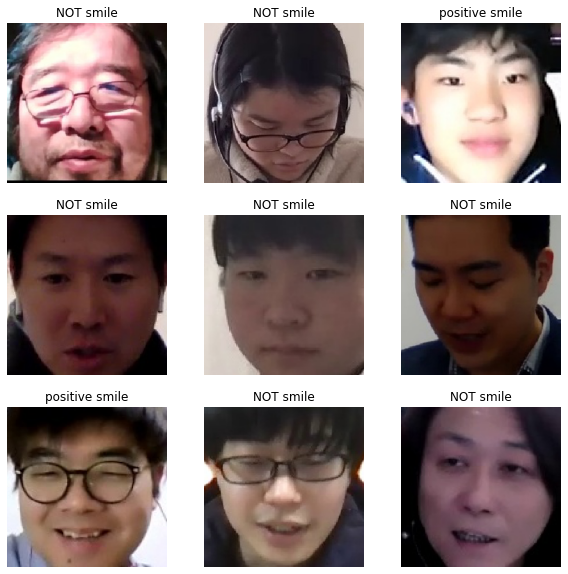

In [ ]:
# Showing different different images with their labels
labels_dict=(train_gen.class_indices)
class_labels=list(labels_dict.keys())
def show_img(img,labels):
      plt.figure(figsize=(10,10))
      for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(img[i])
        plt.title(class_labels[np.argmax(labels[i])])
        plt.axis('off')

show_img(x,y)

# Creating model without using pretrained base

In [ ]:
# Creating model just using convolution and maxpooling layers
from tensorflow.keras import layers
def model_without_pretrained():
        model=keras.Sequential([

                                    layers.Conv2D(32,(3,3),activation='relu',input_shape=(250,250,3)),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(64,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(128,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(128,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(16,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),


                                    layers.Flatten(),
                                    #layers.BatchNormalization(),
                                    layers.Dense(512,activation='relu'),
                                    #layers.Dense(128,activation='relu'),
                                    layers.Dropout(0.2),
                                    layers.Dense(3,activation='softmax')
            ])

        # Compiling model
        model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
        
        return model

In [ ]:
# creating model using function
model=model_without_pretrained()

In [ ]:
# Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 128)      0

In [ ]:
# Specifying model check point
checkpoint_filepath = 'model.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# Fitting data to the model for epochs=30
hist=model.fit(train_gen,validation_data=valid_gen,epochs=40,callbacks=[model_checkpoint_callback])
# # Fitting data to the model for epochs=30
# hist=model.fit(train_gen,validation_data=valid_gen,epochs=1,callbacks=[model_checkpoint_callback])

Epoch 1/40
129/129 [==============================] - 37s 176ms/step - loss: 0.8431 - accuracy: 0.6939 - val_loss: 0.8322 - val_accuracy: 0.6865
Epoch 2/40
129/129 [==============================] - 19s 148ms/step - loss: 0.8121 - accuracy: 0.6961 - val_loss: 0.8296 - val_accuracy: 0.6865
Epoch 3/40
129/129 [==============================] - 19s 147ms/step - loss: 0.8104 - accuracy: 0.6961 - val_loss: 0.8287 - val_accuracy: 0.6865
Epoch 4/40
129/129 [==============================] - 20s 155ms/step - loss: 0.8049 - accuracy: 0.6961 - val_loss: 0.8210 - val_accuracy: 0.6865
Epoch 5/40
129/129 [==============================] - 22s 167ms/step - loss: 0.8033 - accuracy: 0.6961 - val_loss: 0.8261 - val_accuracy: 0.6865
Epoch 6/40
129/129 [==============================] - 21s 158ms/step - loss: 0.8100 - accuracy: 0.6961 - val_loss: 0.8275 - val_accuracy: 0.6865
Epoch 7/40
129/129 [==============================] - 19s 147ms/step - loss: 0.8126 - accuracy: 0.6961 - val_loss: 0.8260 - val_ac

In [ ]:
# Creating datframe of losses and accuracies
hist = pd.DataFrame(hist.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.843072,0.693937,0.832229,0.686464
1,0.812147,0.696129,0.829621,0.686464
2,0.810430,0.696129,0.828671,0.686464
3,0.804946,0.696129,0.820992,0.686464
4,0.803311,0.696129,0.826111,0.686464


Text(0, 0.5, 'Accuracy')

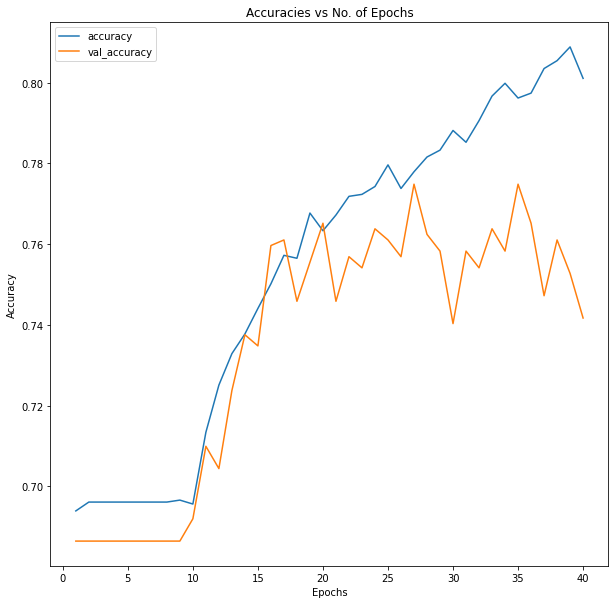

In [ ]:
# # Plotting accuracy plots
plt.figure(figsize=(10,10))
plt.plot(range(1,41),hist[['accuracy','val_accuracy']])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracies vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
 #Plotting accuracy plots
# plt.figure(figsize=(10,10))
# plt.plot(range(1,2),hist[['accuracy','val_accuracy']])
# plt.legend(['accuracy','val_accuracy'])
# plt.title('Accuracies vs No. of Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

In [ ]:
# # Plotting loss plots
plt.figure(figsize=(10,10))
plt.plot(range(1,41),hist[['loss','val_loss']]) 
plt.legend(['loss','val_loss'])
plt.title('Losses vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')
# # Plotting loss plots
# plt.figure(figsize=(10,10))
# plt.plot(range(1,2),hist[['loss','val_loss']])
# plt.legend(['loss','val_loss'])
# plt.title('Losses vs No. of Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Losses')

IndentationError: ignored

In [ ]:
# Evaluating model on training data
print(model.evaluate(train_gen))

# Evaluating model on testing data
print(model.evaluate(test_gen))

In [ ]:
# Create a basic model instance
model_ckpt = model_without_pretrained()
# Loading weights from checkpoint_path
model_ckpt.load_weights(checkpoint_filepath)
# Evaluating model on testing data
print(model_ckpt.evaluate(test_gen))
# Prediction From Model
preds=model_ckpt.predict(test_gen)
# Checking shape of preds
preds.shape

# Create a function for using different different pretrained bases

In [ ]:
# Now we have our training and testing data 
# Building model
from tensorflow.keras import layers,regularizers

# Defining model creating function taking parameter as pretrained_base
def create_model(pretrained_base):
    model=keras.Sequential([
                            pretrained_base,

                            layers.Flatten(),
                            #layers.BatchNormalization(),
                            #layers.Dense(256,activation='relu'),
                            layers.Dense(512,activation='relu'),
                            layers.Dropout(0.5),
                            layers.Dense(3,activation='softmax')
    ])
    
    # Compiling model
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')
    
    return model

# Using InceptionResNetV2 as pretrained base

In [ ]:
# Now i need to use a pretrained model name as InceptionResNetV2
inceptionresnet=tf.keras.applications.InceptionResNetV2(
                              include_top=False,
                              input_shape=(250,250,3),
                              classes=3
)

# Making trainable equals to False
inceptionresnet.trainable=False

In [ ]:
# Calling create_model function for creating model
model_incres=create_model(inceptionresnet)

In [ ]:
# Summary of the model
model_incres.summary()

In [ ]:
# Specifying model check point
checkpoint_filepath1 = 'model_incres'
model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# Fitting data to model
history=model_incres.fit(train_gen,validation_data=valid_gen,epochs=40,callbacks=[model_checkpoint_callback1])


In [ ]:
# Creating datframe of losses and accuracies
hist=pd.DataFrame(history.history)
hist.head()

In [ ]:
# Plotting accuracy plots
plt.figure(figsize=(10,10))
plt.plot(range(1,41),hist[['accuracy','val_accuracy']])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracies vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
# Plotting loss plots
plt.figure(figsize=(10,10))
plt.plot(range(1,41),hist[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.title('Losses vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')

In [ ]:
# Evaluating model on training data
print(model_incres.evaluate(train_gen))

In [ ]:
# Evaluating model on training data
print(model_incres.evaluate(train_gen))
# Evaluating model on testing data

print(model_incres.evaluate(test_gen))

In [ ]:
# Create a basic model instance
model_ckpt1 = create_model(inceptionresnet)

In [ ]:
# Loading weights from checkpoint_path
model_ckpt1.load_weights(checkpoint_filepath1)

In [ ]:
# Evaluating model on testing data
print(model_ckpt1.evaluate(test_gen))

In [ ]:
# Prediction From Model
preds1=model_ckpt1.predict(test_gen)

In [ ]:
# Checking shape of preds
preds1.shape

In [ ]:
preds1 = model.predict(test_gen)

In [ ]:
final_preds = (preds + preds1 )/2

In [ ]:
final_preds=np.argmax(final_preds,axis=1)
final_preds

# Using InceptionV3 as pretrained base

In [ ]:
# pretrained base VGG19
inc=tf.keras.applications.InceptionV3(
                            include_top=False,
                            input_shape=(250,250,3),
                            classes=3
)

inc.trainable=False

In [ ]:
#  Creating model using vgg19 as pretrained base
model_inc=create_model(inc)
model_inc.summary()

In [ ]:
# Specifying model check point
checkpoint_filepath2 = 'model_inc.h5'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# Fitting model
hist2=model_inc.fit(train_gen,validation_data=valid_gen,epochs=40,callbacks=[model_checkpoint_callback2])

Epoch 1/40
129/129 [==============================] - 44s 288ms/step - loss: 4.5027 - accuracy: 0.6504 - val_loss: 0.7006 - val_accuracy: 0.7251
Epoch 2/40
129/129 [==============================] - 32s 252ms/step - loss: 0.7232 - accuracy: 0.7083 - val_loss: 0.7706 - val_accuracy: 0.7030
Epoch 3/40
129/129 [==============================] - 33s 252ms/step - loss: 0.7019 - accuracy: 0.6971 - val_loss: 0.6987 - val_accuracy: 0.6878
Epoch 4/40
129/129 [==============================] - 33s 253ms/step - loss: 0.6920 - accuracy: 0.6961 - val_loss: 0.7382 - val_accuracy: 0.6865
Epoch 5/40
129/129 [==============================] - 33s 258ms/step - loss: 0.6759 - accuracy: 0.7042 - val_loss: 0.7232 - val_accuracy: 0.7486
Epoch 6/40
129/129 [==============================] - 33s 252ms/step - loss: 0.6527 - accuracy: 0.7400 - val_loss: 0.6990 - val_accuracy: 0.7417
Epoch 7/40
129/129 [==============================] - 33s 252ms/step - loss: 0.6705 - accuracy: 0.7239 - val_loss: 0.7320 - val_ac

In [ ]:

# Creating datframe of losses and accuracies
hist2=pd.DataFrame(hist2.history)
hist2.head()

,loss,accuracy,val_loss,val_accuracy
0,4.502742,0.650353,0.700609,0.725138
1,0.723235,0.708303,0.770620,0.703039
2,0.701898,0.697102,0.698688,0.687845
3,0.691967,0.696129,0.738209,0.686464
4,0.675930,0.704164,0.723173,0.748619


Text(0, 0.5, 'Accuracy')

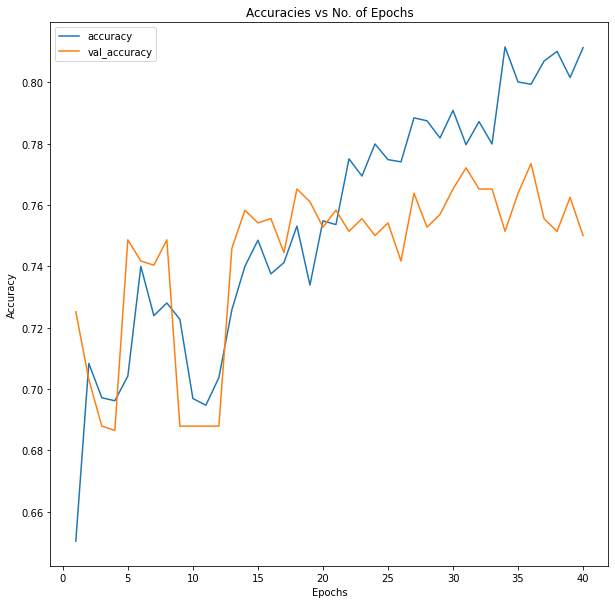

In [ ]:
# Plotting accuracy plots
plt.figure(figsize=(10,10))
plt.plot(range(1,41),hist2[['accuracy','val_accuracy']])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracies vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Losses')

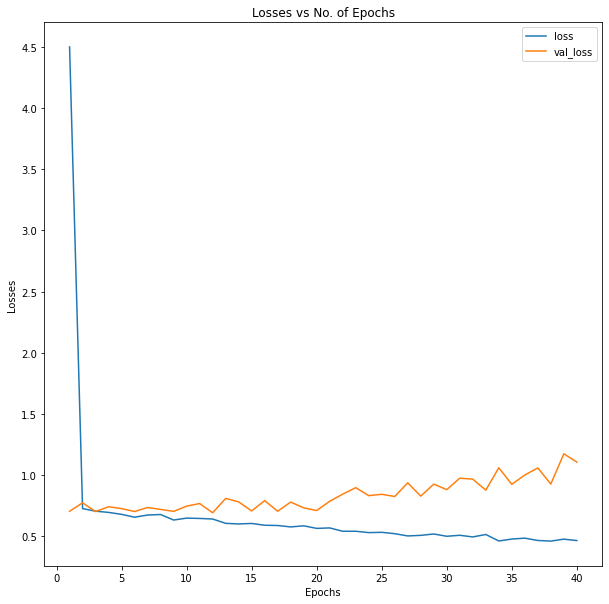

In [ ]:
# Plotting loss plots
plt.figure(figsize=(10,10))
plt.plot(range(1,41),hist2[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.title('Losses vs No. of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')

In [ ]:
# Evaluating model on training data
print(model_inc.evaluate(train_gen))

129/129 [==============================] - 26s 204ms/step - loss: 0.3386 - accuracy: 0.8773
[0.3386114537715912, 0.8772826790809631]


In [ ]:
# Evaluating model on testing data

print(model_inc.evaluate(test_gen))

51/51 [==============================] - 10s 203ms/step - loss: 0.7958 - accuracy: 0.7753
[0.7957692742347717, 0.775294840335846]


In [ ]:
# Create a basic model instance
model_ckpt2 = create_model(inc)
# Loading weights from checkpoint_path
model_ckpt2.load_weights(checkpoint_filepath2)
# Evaluating model on testing data
print(model_ckpt2.evaluate(test_gen))
# Prediction From Model
preds2=model_ckpt2.predict(test_gen)
# Checking shape of preds
preds2.shape

51/51 [==============================] - 13s 204ms/step - loss: 0.8166 - accuracy: 0.7765
[0.8165838718414307, 0.7765362858772278]


(1611, 3)

# Using ResNet50 as pretrained base

In [ ]:
# Taking ResNet50 as pretrained base
resnet=tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(250,250,3),
    classes=3
)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# using create_model function
model_resnet=create_model(resnet)

In [ ]:
# model summary
model_resnet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 131072)            0         
                                                                 
 dense_12 (Dense)            (None, 512)               67109376  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 90,698,627
Trainable params: 90,645,507
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
# Specifying model check point
checkpoint_filepath3 = 'model_resnet.h5'
model_checkpoint_callback3 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath3,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# training model
hist3=model_resnet.fit(train_gen,validation_data=valid_gen,epochs=40,callbacks=[model_checkpoint_callback3])

ResNet50 is best at 17 

In [ ]:
# Evaluating model on training data
print(model_resnet.evaluate(train_gen))

In [ ]:
# Evaluating model on training data
print(model_resnet.evaluate(test_gen))

In [ ]:
# Create a basic model instance
model_ckpt3 = create_model(resnet)
# Loading weights from checkpoint_path
model_ckpt3.load_weights(checkpoint_filepath3)
# Evaluating model on testing data
print('testing evaluation :',model_ckpt3.evaluate(test_gen))
# Prediction From Model
preds3=model_ckpt3.predict(test_gen)
# Checking shape of preds
print('prediction shape :',preds3.shape)

# Using Xception as pretrained base

In [ ]:
# Pretrined base
xception=keras.applications.Xception(
    include_top=False,
    input_shape=(250,250,3),
    classes=3
)

xception.trainable=False

In [ ]:
# Creating model using create_model function
model_x=create_model(xception)

In [ ]:
# model summary
model_x.summary()

In [ ]:
# Specifying model check point
checkpoint_filepath4 = 'model_x.h5'
model_checkpoint_callback4 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath4,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# Fitting data to model
hist_x=model_x.fit(train_gen,validation_data=valid_gen,epochs=40,callbacks=[model_checkpoint_callback4])

In [ ]:
# Create a basic model instance
model_ckpt4 = create_model(xception)
# Loading weights from checkpoint_path
model_ckpt4.load_weights(checkpoint_filepath4)
# Evaluating model on testing data
print(model_ckpt4.evaluate(test_gen))
# Prediction From Model
preds4=model_ckpt4.predict(test_gen)
# Checking shape of preds
preds4.shape

# ResNet50 is giving better results
# Testing Accuracy = 0.8032277822494507
# Testing Loss = 0.668159544467926